## Group: Jingmin Chen, Tianyu Sun

## Introduction

1. Import the file into a DataFrame, giving the description of the columns, and then reindex the df columns meaningfully.
2. According to the observation of df.describe(), we have a general understanding of the data, and get the columns that need to be processed for missing values, which need to be processed in the subsequent data preprocessing.
3. Observe df.dtypes, observe the data types of each field, and subsequent preprocessing may require conversion of each field.

In [1]:
# import the module
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data to df
df =  pd.read_csv('https://raw.githubusercontent.com/TTZUO/DAV-6150/master/M3_Data.csv')

In [3]:
# read the data columns
df.columns

Index(['INDEX', 'TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'STARS'],
      dtype='object')

In [8]:
# The original column was a mess, and we needed to define an ordered column to get a better look at the data, 
# such as putting the 'Acid' together and putting the 'Dioxide' together.
columns = ['INDEX', 'TARGET','STARS','LabelAppeal','AcidIndex','FixedAcidity','VolatileAcidity','CitricAcid',\
          'Chlorides','FreeSulfurDioxide','TotalSulfurDioxide','ResidualSugar','Sulphates','Alcohol',\
          'Density','pH']
df = df.loc[:,columns]

Data Set Attribute| Description
 :- | :- 
INDEX|Unique ID
TARGET|Response Variable (indicates # of cases of wine sold)
STARS|Wine rating as determined by experts (4 = excellent; 1 = Poor)
LabelAppeal|Subjective marketing score that indicates the appeal of the design of the label on the bottle
AcidIndex|Measures total acidity of wine via a weighted average
FixedAcidity|FixedAcidity of the wine
VolatileAcidity|Volatile acid content of the wine
CitricAcid|Citric Acid content of the wine
Chlorides|Chloride content of the wine
FreeSulfurDioxide|Sulfur Dioxide content of the wine
TotalSulfurDioxide|Total sulfur dioxide content of the wine
ResidualSugar|Residual sugar content of the wine
Sulphates|Sulfate content of the wine
Alcohol|Alcohol Content
Density|Density of the wine
pH|pH of the wine

In [4]:
# first of all, look at df.describe()
# We can get a sense of the whole data.
df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


Negative values were observed for some data, for example: LabelAppeal，FixedAcidity，VolatileAcidity，CitricAcid，Chlorides，FreeSulfurDioxide，TotalSulfurDioxide，ResidualSugar，Sulphates，Alcohol.<br>
We might want to filter or convert negative data

In [5]:
# Columns for missing data are:
# ['STARS', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide','ResidualSugar', 'Sulphates', 'Alcohol', 'pH']
cols_missing = df.describe().columns[df.describe().loc['count'] != 12795]
cols_missing

Index(['ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'pH', 'Sulphates', 'Alcohol', 'STARS'],
      dtype='object')

In [6]:
# these five columns ['INDEX', 'TARGET', 'STARS', 'LabelAppeal', 'AcidIndex'] should be the categorical variable.
# but the STARS.type is float64, because STARS contains missing values.
df.dtypes

INDEX                   int64
TARGET                  int64
FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
pH                    float64
Sulphates             float64
Alcohol               float64
LabelAppeal             int64
AcidIndex               int64
STARS                 float64
dtype: object

## Exploratory Data Analysis

#### For a wine, each column has its own meaning. The Exploratory Data Analysis mainly starts with the following directions：
* Observe the histogram of data distribution for each column
* Observe the correlation between the columns
* a 3d classification scatter plot for TARGET, STARS and VolatileAcidity

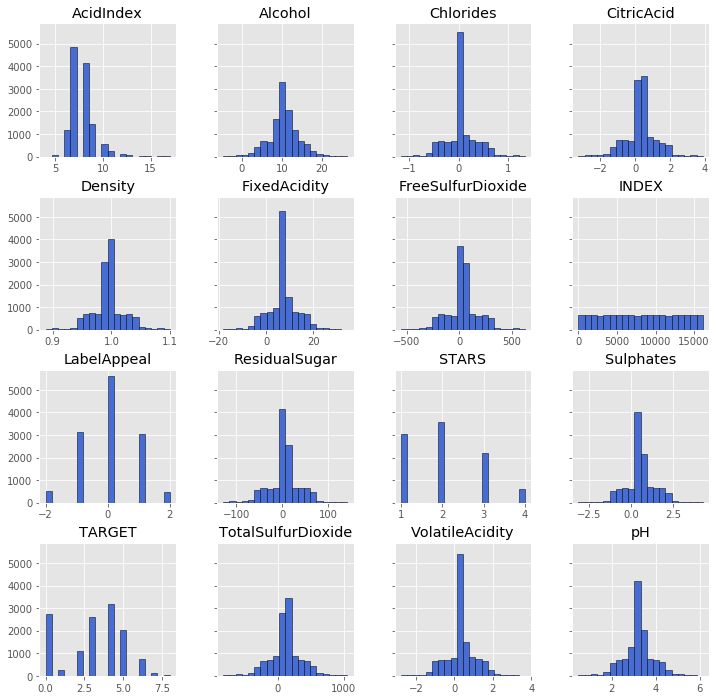

In [10]:
# Observe the histogram of data distribution for each column
# There is a common Y-axis between each histogram
plt.style.use("ggplot")  
_ = df.hist(column=columns, figsize=(12,12), color="#476DD5", edgecolor="k",sharey =True,bins =20)

Looking at the histogram of various columns above, we can see that most columns follow a normal distribution, with high in the middle and low on both sides.<br>
the TotalSulfurDioxide range from -800 tp 1000.<br>
the FreeSulfurDioxide range from -500 to 600.<br>
Large or small abnormal value are not what we want, we need to deal with them.

----

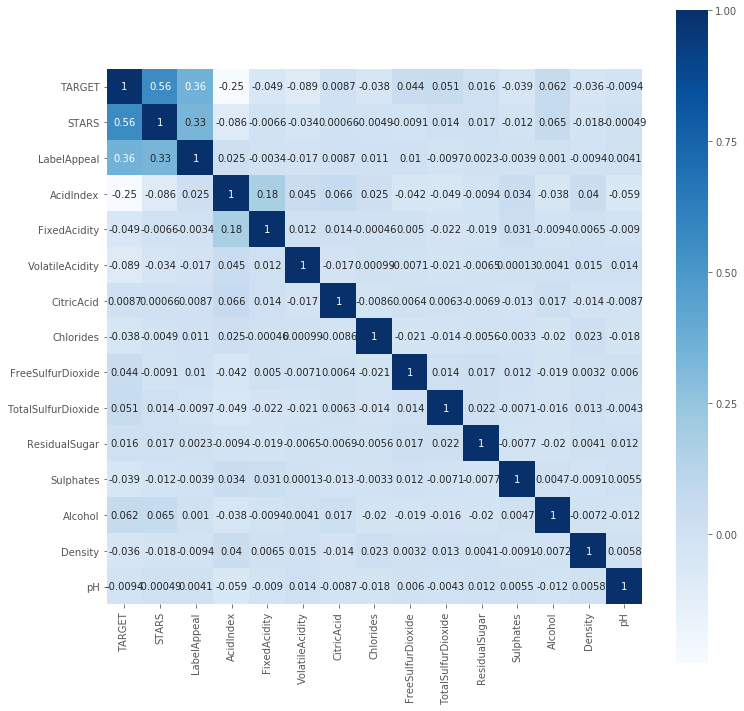

In [11]:
# Observe the correlation between fields outside INDEX directly.
dfcorr = df.iloc[:,1:].corr()
fig = plt.figure(figsize=(12,12))
sns.heatmap(dfcorr, annot=True, vmax=1, square=True, cmap="Blues")

It can be observed that the correlation between TARGET and STARS is relatively strong, with 0.56 greater than 0.5 <br>
There is also a weak correlation between TARGET and AcidIndex, which is -0.25 <br>
There is no obvious correlation between most of the data. <br>

   ----

In [12]:
print(columns)

['INDEX', 'TARGET', 'STARS', 'LabelAppeal', 'AcidIndex', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'ResidualSugar', 'Sulphates', 'Alcohol', 'Density', 'pH']


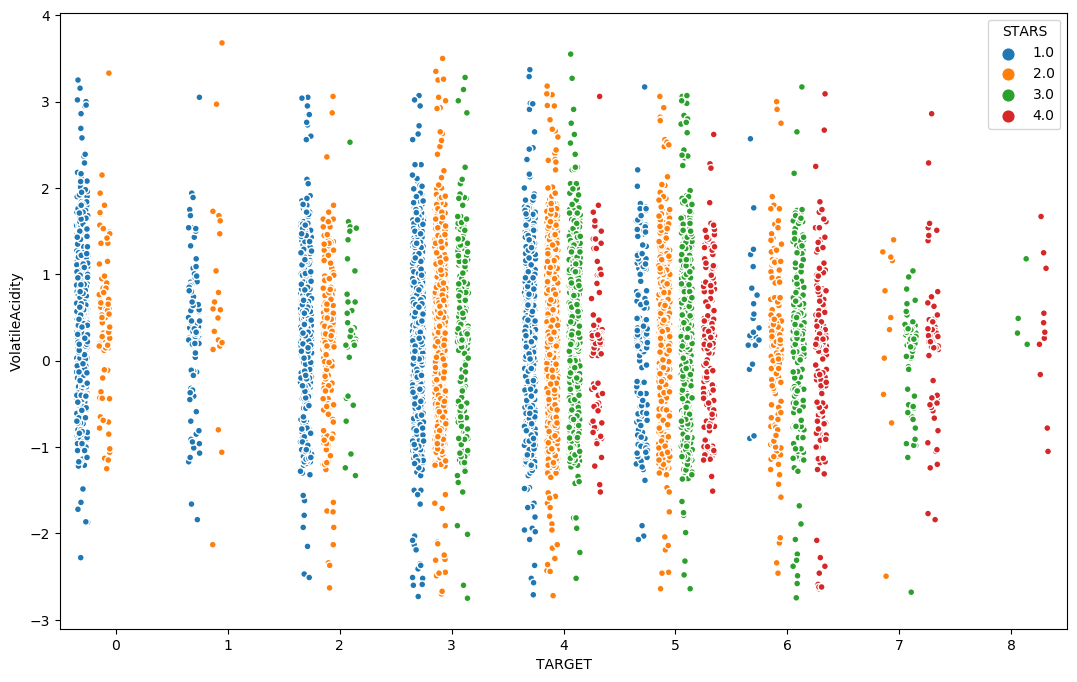

In [13]:
plt.style.use("default") 
fig = plt.figure(figsize=(13,8))
sns.stripplot(x = 'TARGET',           
             y = 'VolatileAcidity',     
              hue = 'STARS',
              dodge = True,
             data = df,            
             jitter = 0.2,         
             size = 5,edgecolor = 'w',linewidth = 1,marker = 'o'   
             )

This is a 3d classification scatter plot derived from the TARGET, STARS and VolatileAcidity. <br>
We can see that only when TARGET>=4, there will be STARS =4 wine. <br>
wine with 4 stars'VolatileAcidity usually between minus 1 and 2.<br>
*We could do a similar figure for the other columns, but we get similar results.*

## Data Preparation

+ for the abnormal value（Negative values and methods of max-min）
+ for the missing data
+ Standardization and normalization
+ for the column: 'LabelAppeal', coding [-2,-1,0,1,2] to [1,2,3,4,5]
----

#### for the abnormal value（Negative values and methods of max-min）

In [14]:
# for the abnormal value
# These columns contain negative values: LabelAppeal，FixedAcidity，VolatileAcidity，CitricAcid，
# Chlorides，FreeSulfurDioxide，TotalSulfurDioxide，ResidualSugar，Sulphates，Alcohol.
# But for the LabelAppeal,it's normal.
# And for the other columns, we must transform them, they should not contain negative values.

In [15]:
import copy
df_tmp = copy.deepcopy(df)

In [16]:
# Method : replace with the absolute value
nega_col = ['FixedAcidity','VolatileAcidity','CitricAcid', 'Chlorides', \
          'FreeSulfurDioxide','TotalSulfurDioxide','ResidualSugar','Sulphates','Alcohol']
df_tmp[df_tmp.loc[:,nega_col]<0] = -df_tmp[df_tmp.loc[:,nega_col]<0]

#### for the missing data

In [17]:
# replace with an average
df_tmp.fillna(df_tmp.mean()[cols_missing[1:]],inplace=True)
df_tmp.head()

,INDEX,TARGET,STARS,LabelAppeal,AcidIndex,FixedAcidity,VolatileAcidity,CitricAcid,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,ResidualSugar,Sulphates,Alcohol,Density,pH
0,1,3,2.0,0,8,3.2,1.160,0.98,0.567000,106.679042,268.0,54.2,0.59,9.900000,0.99280,3.33
1,2,3,3.0,-1,7,4.5,0.160,0.81,0.425000,15.000000,327.0,26.1,0.70,10.523778,1.02792,3.38
2,4,5,3.0,-1,8,7.1,2.640,0.88,0.037000,214.000000,142.0,14.8,0.48,22.000000,0.99518,3.12
3,5,3,1.0,-1,6,5.7,0.385,0.04,0.425000,22.000000,115.0,18.8,1.83,6.200000,0.99640,2.24
4,6,4,2.0,0,9,8.0,0.330,1.26,0.222559,167.000000,108.0,9.4,1.77,13.700000,0.99457,3.12


#### Standardization and normalization

In [18]:
normal_cols = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'Chlorides', 'FreeSulfurDioxide', \
               'TotalSulfurDioxide', 'ResidualSugar', 'Sulphates', 'Alcohol', 'Density', 'pH']
f = lambda x:(x-x.min())/(x.max()-x.min())
df_tmp.loc[:,normal_cols] = df_tmp.loc[:,normal_cols].apply(f)

####  for the column: 'LabelAppeal', coding [-2,-1,0,1,2] to [0.1,2,3,4]

In [19]:
from sklearn import preprocessing  
le =preprocessing.LabelEncoder()

In [20]:
le.fit([-2,-1,0,1,2])
df_tmp.LabelAppeal = Series(le.transform(df_tmp.LabelAppeal))

In [21]:
df_tmp.head()

,INDEX,TARGET,STARS,LabelAppeal,AcidIndex,FixedAcidity,VolatileAcidity,CitricAcid,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,ResidualSugar,Sulphates,Alcohol,Density,pH
0,1,3,2.0,2,8,0.093023,0.315217,0.253886,0.419689,0.171234,0.253548,0.383989,0.139151,0.373585,0.495903,0.504425
1,2,3,3.0,1,7,0.130814,0.043478,0.209845,0.314582,0.024077,0.309366,0.184910,0.165094,0.397124,0.662231,0.513274
2,4,5,3.0,1,8,0.206395,0.717391,0.227979,0.027387,0.343499,0.134342,0.104853,0.113208,0.830189,0.507175,0.467257
3,5,3,1.0,1,6,0.165698,0.104620,0.010363,0.314582,0.035313,0.108798,0.133192,0.431604,0.233962,0.512953,0.311504
4,6,4,2.0,2,9,0.232558,0.089674,0.326425,0.164736,0.268058,0.102176,0.066596,0.417453,0.516981,0.504286,0.467257


----
## Prepped Data Review

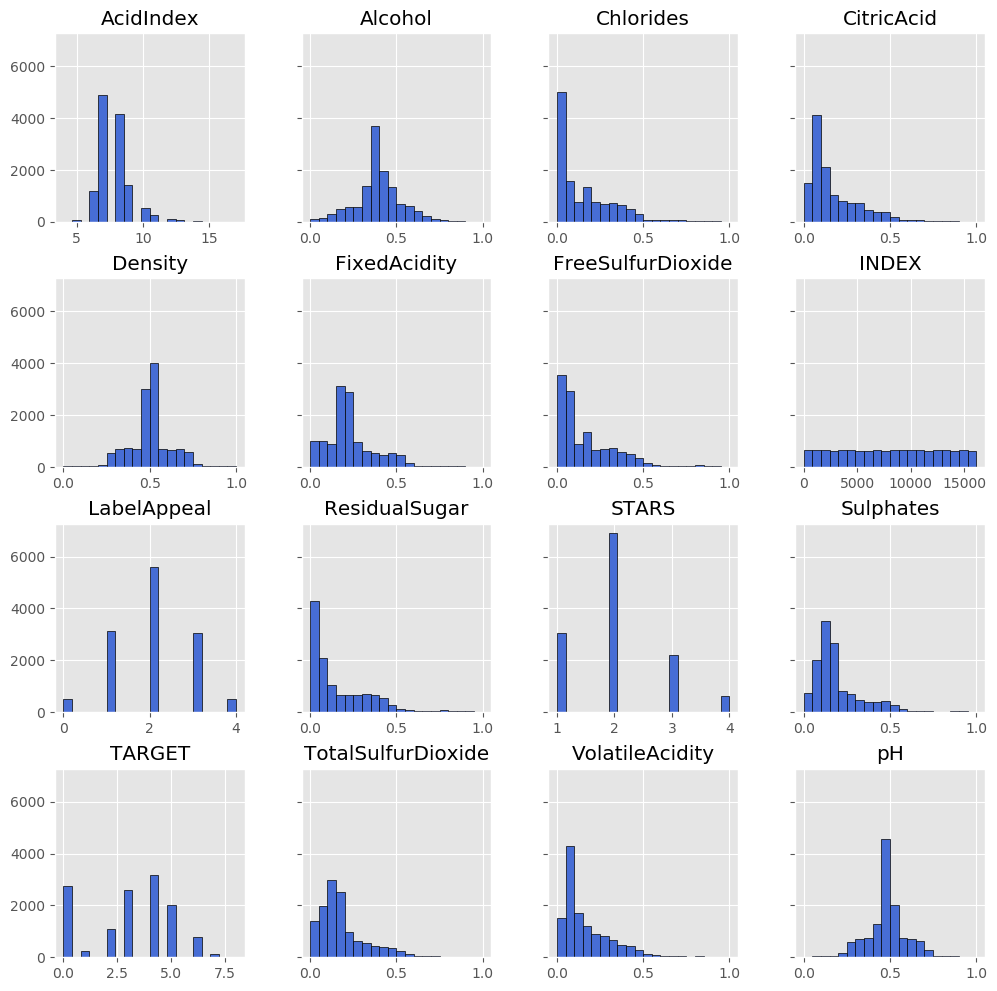

In [22]:
# Observe the histogram of data distribution for each column
# There is a common Y-axis between each histogram
plt.style.use("ggplot")  
_ = df_tmp.hist(column=columns, figsize=(12,12), color="#476DD5", edgecolor="k",sharey =True,bins =20)

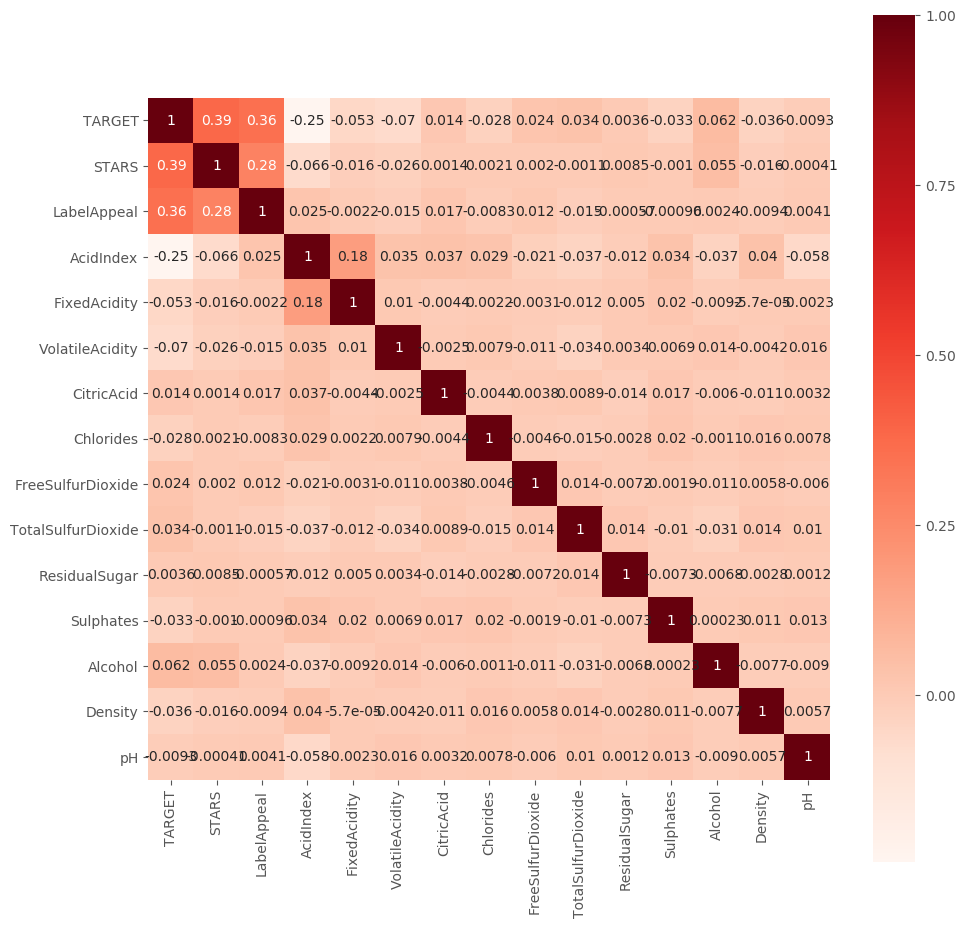

In [23]:
# Observe the new correlation
dfcorr = df_tmp.iloc[:,1:].corr()
fig = plt.figure(figsize=(11,11))
sns.heatmap(dfcorr, annot=True, vmax=1, square=True, cmap="Reds")

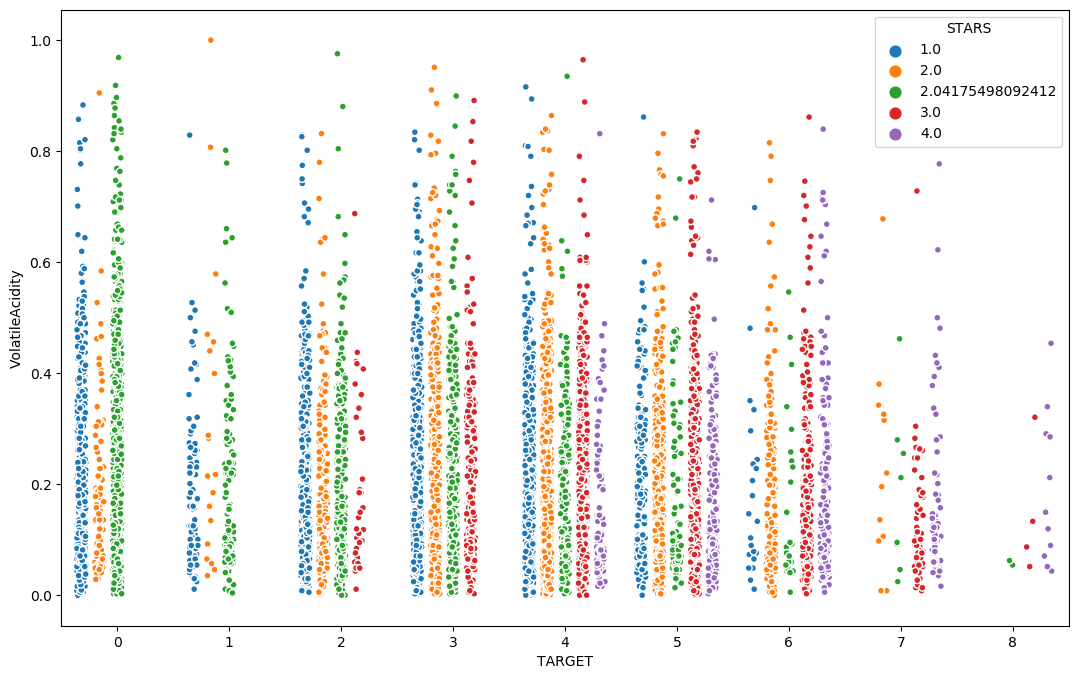

In [24]:
plt.style.use("default") 
fig = plt.figure(figsize=(13,8))
sns.stripplot(x = 'TARGET',            
             y = 'VolatileAcidity',     
              hue = 'STARS',
              dodge = True,
             data = df_tmp,            
             jitter = 0.2,       
             size = 5,edgecolor = 'w',linewidth = 1,marker = 'o'   
             )

## Conclusions

- Exploratory Data Analysis 
    + df.describe()
    + hist
    + scatter
-  Data Preparation
    + deal with missing values
    + normalization
    + label coding
- After we deal with missing values and normalization, our data has become more realistic and more suitable for model training